In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_pokemon = pd.read_csv("Pokemon.csv")
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df_pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df_pokemon["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

<AxesSubplot:>

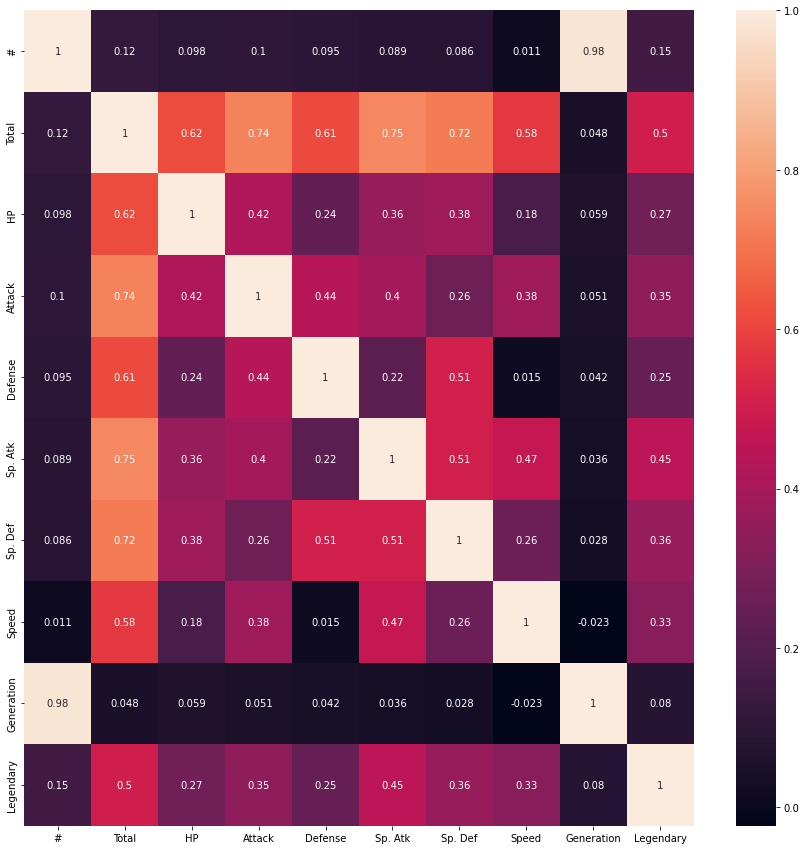

In [6]:
corr_matrix = df_pokemon.corr()
corr_matrix
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap="rocket") #annot rakamlari gosterir, cmap renkleri degistirir

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

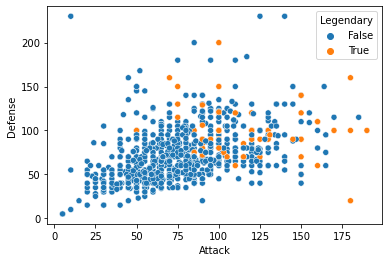

In [7]:
sns.scatterplot(data=df_pokemon, x="Attack", y="Defense", hue="Legendary")

In [8]:
px.scatter(data_frame=df_pokemon, x="Attack", y="Defense", color="Legendary")

In [9]:
px.histogram(data_frame=df_pokemon, x="Speed", color="Type 1")

In [ ]:
#now we will implement pareto 

In [12]:
type_group = df_pokemon.groupby("Type 1").agg({"Name":"count","Speed":"sum","Defense":["sum","median","std"]})
type_group

name_count = df_pokemon.groupby("Type 1").agg({"Name":"count"})
name_count.reset_index(inplace=True)
name_count.sort_values(by="Name",ascending=False,inplace=True)
name_count

,Type 1,Name
17,Water,112
12,Normal,98
9,Grass,70
0,Bug,69
14,Psychic,57
6,Fire,52
3,Electric,44
15,Rock,44
8,Ghost,32
10,Ground,32


In [27]:
name_count["percentage"] = name_count["Name"]/name_count["Name"].sum()*100
name_count

,Type 1,Name,percentage
17,Water,112,14.000
12,Normal,98,12.250
9,Grass,70,8.750
0,Bug,69,8.625
14,Psychic,57,7.125
6,Fire,52,6.500
3,Electric,44,5.500
15,Rock,44,5.500
8,Ghost,32,4.000
10,Ground,32,4.000


In [20]:
px.pie(data_frame=name_count, values="percentage", names="Type 1")

In [1]:
#in this example using paredo method useless because our data distribution is normal like

100.0